In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
advertising = pd.read_csv('Advertising.csv',usecols=[1,2,3,4])

In [5]:
 advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
 advertising.shape

(200, 4)

In [7]:
 advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
 advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Exploratory Data Analysis

## Data Analysis

In [9]:
pd.set_option('precision', 2) 
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


## Analysis of Zero Values in Predictors

In [10]:
pd.set_option('precision', 2) 
In [11]: advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


## Response Variable Analysis

In [11]:
 advertising.Sales.value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: Sales, Length: 121, dtype: int64

## Relation between Sales and TV

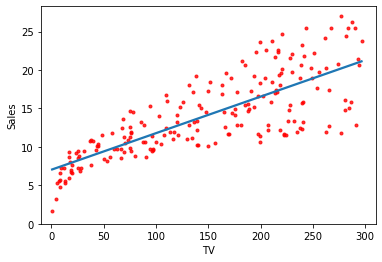

In [13]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

## Relation between Sales and Radio

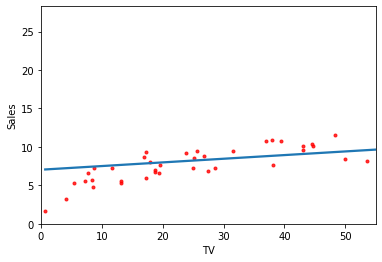

In [14]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,55)
plt.ylim(bottom=0)
plt.show()

## Relation between Sales and Newspaper

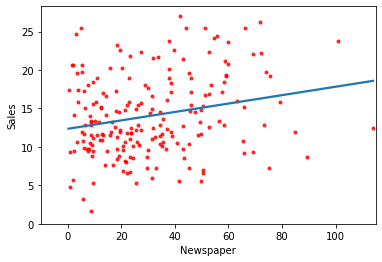

In [15]:
sns.regplot(advertising.Newspaper, advertising.Sales, order=1, ci=None,
scatter_kws={'color':'r', 's':9})
plt.xlim(-10,115)
plt.ylim(bottom=0)
plt.show()

## Scale the Data

In [16]:

from sklearn.preprocessing import scale
X = scale(advertising.TV, with_mean=True, with_std=False ).reshape(-1, 1)
y = advertising.Sales
# scale - standardize the data set along any axis
# with_mean = True If True, center the data before scaling
# with_std = If True, scale the data to unit variance
# reshape (-1,1) one of new shape parameter as -1. It is an unknown dimension and we want

In [17]:
 X[0:5]

array([[  83.0575],
       [-102.5425],
       [-129.8425],
       [   4.4575],
       [  33.7575]])

In [18]:
X.mean()

1.0089706847793422e-14

In [19]:
X.std()

85.63933175679269

# Data Modeling
## Linear Regression Using sklearn (scaled data)

In [20]:
 import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()

In [22]:
regr.fit(X,y)

LinearRegression()

In [23]:
regr.intercept_

14.0225

In [24]:
regr.coef_

array([0.04753664])

## RSS using sklearn (scaled data)

In [25]:
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)

In [26]:
min_rss

2102.5305831313512

## RSS using sklearn (Unscaled data)

In [27]:
regr = skl_lm.LinearRegression()
X = advertising.TV.values.reshape(-1,1) 
y = advertising.Sales

In [28]:
regr.fit(X,y)

LinearRegression()

In [29]:
regr.coef_

array([0.04753664])

In [30]:
regr.intercept_

7.032593549127693

## RSS & MSE (Unscaled)

In [33]:
 min_rss = np.sum((regr.intercept_+regr.coef_*X -y.values.reshape(-1,1))**2)
min_rss

2102.5305831313512

In [35]:
mse=min_rss/len(y)
mse

10.512652915656757

## MSE, R-Sq Using Sklearn

In [36]:
 from sklearn.metrics import mean_squared_error, r2_score
Sales_pred = regr.predict(X)

In [37]:
 r2_score(y, Sales_pred)

0.611875050850071

In [38]:
 mean_squared_error(y, Sales_pred)

10.512652915656757

## Regression Summary using statsmodels

In [39]:
 import statsmodels.formula.api as smf
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        17:08:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regression RSS, MSE Using statsmodels

In [40]:
est.params

Intercept    7.03
TV           0.05
dtype: float64

In [41]:
((advertising.Sales - (est.params[0] + est.params[1] * advertising.TV))** 2).sum()

2102.530583131351

In [42]:
 ((advertising.Sales - (est.params[0] + 
est.params[1]*advertising.TV))** 2).sum()/len(advertising.Sales)

10.512652915656753

# Multiple Linear Regression
## Linear Regression for Radio

In [48]:
 est = smf.ols('Sales ~ Radio', advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243


## Linear Regression for Newspaper

In [52]:
 est = smf.ols('Sales ~ Newspaper', advertising).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087


In [53]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        17:15:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00
